In [1]:
#데이터마이닝및시각화 8주차 과제
#정보통신공학과 60191933 오은빈
import requests
from pandas import DataFrame
from bs4 import BeautifulSoup
import re
from datetime import datetime
import os

date = str(datetime.now())
date = date[:date.rfind(':')].replace(' ', '_')
date = date.replace(':','시') + '분'

In [6]:
query =  '무인매장'
news_num = 100 
query = query.replace(' ', '+')


news_url = 'https://search.naver.com/search.naver?where=news&sm=tab_jum&query={}'

req = requests.get(news_url.format(query))
soup = BeautifulSoup(req.text, 'html.parser')


news_dict = {}
idx = 0
cur_page = 1

print()
print('크롤링 중...')
while idx < news_num:
### 네이버 뉴스 웹페이지 구성이 바뀌어 태그명, class 속성 값 등을 수정함(20210126) ###
    table = soup.find('ul',{'class' : 'list_news'})
    li_list = table.find_all('li', {'id': re.compile('sp_nws.*')})
    area_list = [li.find('div', {'class' : 'news_area'}) for li in li_list]
    a_list = [area.find('a', {'class' : 'news_tit'}) for area in area_list]
    for n in a_list[:min(len(a_list), news_num-idx)]:
        news_dict[idx] = {'title' : n.get('title'),
                          }
        idx += 1
    cur_page += 1
    pages = soup.find('div', {'class' : 'sc_page_inner'})
    next_page_url = [p for p in pages.find_all('a') if p.text == str(cur_page)][0].get('href')
    req = requests.get('https://search.naver.com/search.naver' + next_page_url)
    soup = BeautifulSoup(req.text, 'html.parser')


크롤링 중...


In [11]:
news_dict[0]['title']

'[그래?픽!]절도에 성폭력까지…늘어가는 촉법소년 범죄'

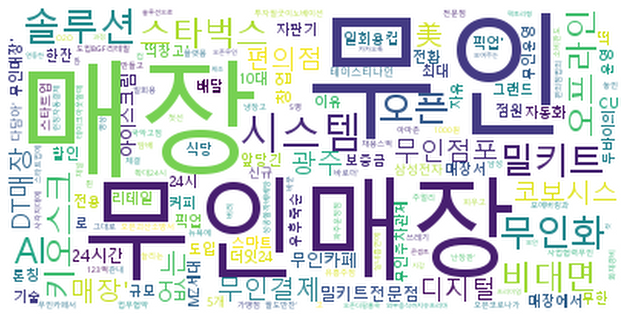

In [7]:
#1번 - 크롤링한 뉴스 타이틀을 워드클라우드로 보임
from wordcloud import WordCloud
import matplotlib.pyplot as plt

a = list(news_dict.values())  #이중 딕셔너리의 값들만(내부 딕셔너리) 리스트에 저장
text = ""  #빈 텍스트 생성
for lst in a: 
    text += lst['title']  #딕셔너리의 값을 텍스트에 추가
    
#맑은고딕체, 배경색 흰색으로 워드클라우드 텍스트 생성
wc = WordCloud(font_path = 'C:\Windows\Fonts\\malgun.ttf', background_color = 'white').generate(text)

plt.figure(figsize = (11,11))  #그림 크기
plt.imshow(wc, interpolation = 'lanczos')  #이미지 보이기
plt.axis('off')  #축 삭제
plt.show()

In [5]:
import numpy as np
import pandas as pd
data = pd.read_csv('nba.csv')  #파일 로드

In [6]:
#2번 - 포지션과 팀을 인덱스로 나이, 연봉에 대한 피봇 테이블 생성
data.pivot_table(['Age', 'Salary'], index = ['Position', 'Team'])

Age        Salary
Position Team                                       
C        Atlanta Hawks       28.333333  7.585417e+06
         Boston Celtics      25.000000  2.450465e+06
         Brooklyn Nets       27.000000  1.031814e+07
         Charlotte Hornets   25.666667  6.772240e+06
         Chicago Bulls       33.000000  1.042438e+07
...                                ...           ...
SG       Sacramento Kings    26.250000  2.794976e+06
         San Antonio Spurs   31.250000  3.384923e+06
         Toronto Raptors     24.500000  5.350000e+06
         Utah Jazz           23.500000  5.405962e+06
         Washington Wizards  27.250000  2.839248e+06

[149 rows x 2 columns]

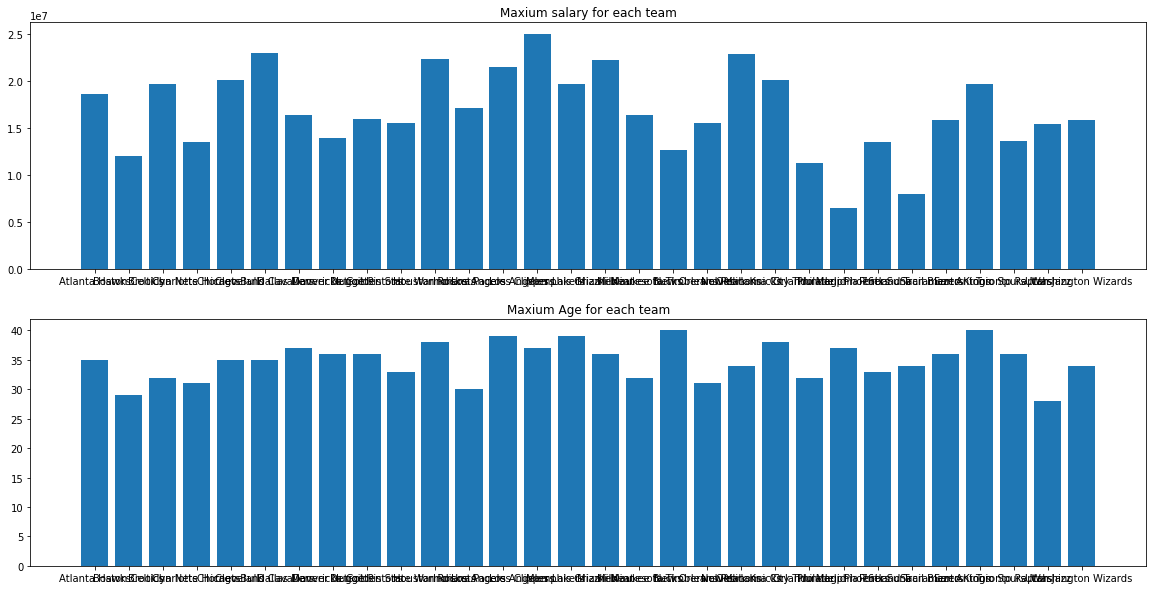

In [7]:
#3번 - 팀별 최고령자 및 최고 연봉자 그림으로 나타내기
plt.figure(figsize = (20, 10))
plt.subplots_adjust(hspace = 0.2)

plt.subplot(2, 1, 1)  #첫 번째 그림
plt.title("Maxium salary for each team")  #제목 설정
rich = data['Salary'].groupby(data['Team']).max()  #연봉을 팀별로 그룹화하여 최대값을 저장
plt.bar(np.array(rich.index), rich)  #x축은 선수 이름, y축은 연봉

plt.subplot(2, 1, 2)  #두 번째 그림
plt.title("Maxium Age for each team")  #제목 설정
people = data['Age'].groupby(data['Team']).max()  #나이를 팀별로 그룹화하여 최대값 저장
plt.bar(np.array(people.index), people)  #x축은 선수 이름, y축은 나이

plt.show()